**Develop a Linear Regression model using Keras Tensorflow**

Splitting "HousingData" dataset into different training and testing sets
in order to examine which separation scores better. 


In [1]:
import numpy as np
import pandas as pd
import math
import os
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics, preprocessing
import matplotlib.pyplot as plt 

In [2]:
#Import csv file with data
filename = "HousingData.csv"
data_multi = pd.read_csv(filename,header= None, names =["CRIM","ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD","TAX", "PTRATIO", "B", "LSTAT", "MEDV"]) 

print ("Total number of rows in dataset = {}".format(data_multi.shape[0]))
print ("Total number of columns in dataset = {}".format(data_multi.shape[1]))

Total number of rows in dataset = 507
Total number of columns in dataset = 14


In [3]:
#new value df
df=data_multi 
#new value in order to fill nan values equal to 0
df_nonnan= df.dropna() 
#new value for removing the first row with headers
headers_del= df_nonnan.drop(df_nonnan.index[0])
headers_del.head()

temp_multi = headers_del.to_numpy(dtype=np.float64)

In [8]:
#features and target values
X_multi = temp_multi[:,:-1] # get vectors for features=X
y_multi = temp_multi[:,-1] # get vectors for output values for MEDV(y)

1. Splitting dataset into 90% for training set and 10% for testing set




In [9]:
#normalize features
X_multi = preprocessing.normalize(X_multi)

X_multi = np.column_stack((np.ones((X_multi.shape[0])),X_multi))

#split data into training and test set
X_train, X_test, y_train, y_test= train_test_split(X_multi,y_multi, test_size=0.10, train_size=0.90, random_state=2)

#create an linear regression object
regr_multi = linear_model.LinearRegression()

#Train my model
regr_multi.fit(X_train, y_train)

#print bias
print("Bias: ",regr_multi.intercept_)
#print coeff's
Coefficients= regr_multi.coef_
print('Coefficients: \n', Coefficients)

Bias:  5.0448935512668065
Coefficients: 
 [ 0.00000000e+00 -7.95075921e+01  1.61269189e+01  1.34105218e+01
  1.51151946e+03 -7.60240992e+03  3.02378982e+03 -6.23051342e+00
 -5.65852619e+02  1.27034602e+02  4.46327467e+00 -4.26453804e+02
  1.17433678e+01 -1.76545244e+02]


RSE for test set=  0.22028632828361233
R2 for test set=  0.7141337675422501


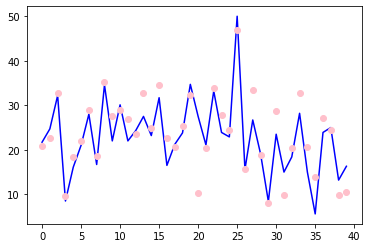

In [10]:
#make predictions with testing set
y_pred = regr_multi.predict(X_test)

#make predictions with training set
y_pred_train = regr_multi.predict(X_train)

#ploting actual target values and predictions
plt.plot(y_test, color='blue')
plt.plot(y_pred, 'o', color='pink')

num_data=X_multi.shape[0]

# The RSE for testing set
mse= metrics.mean_squared_error(y_test, y_pred)
print('RSE for test set= ', math.sqrt(mse/(num_data-2)))
# The coefficient of determination for testing set
print('R2 for test set= ', metrics.r2_score(y_test,y_pred))

In [11]:
# The RSE for training set
mse= metrics.mean_squared_error(y_train, y_pred_train)
print('RSE for training set= ', math.sqrt(mse/(num_data-2)))
# The coefficient of determination for training set
print('R2 for training set= ', metrics.r2_score(y_train,y_pred_train))

RSE for training set=  0.21932530766492805
R2 for training set=  0.7788274150319008


2. Splitting dataset into 50% for training set and 50% for testing set




In [12]:
X_train1, X_test1, y_train1, y_test1= train_test_split(X_multi,y_multi, test_size=0.50, train_size=0.50, random_state=4)
regr_multi = linear_model.LinearRegression()
regr_multi.fit(X_train1, y_train1)
y_pred1 = regr_multi.predict(X_test1)

#make predictions with training set
y_pred_train1 = regr_multi.predict(X_train1)


# The RSE for testing set
mse1= metrics.mean_squared_error(y_test1, y_pred1)
print('RSE for testing set(1)= ', math.sqrt(mse1/(num_data-2)))
# The coefficient of determination for testing set
print('R2 for testing set(1)= ', metrics.r2_score(y_test1,y_pred1))

RSE for test set(1)=  0.2562774467403183
R2 for test set(1)=  0.6916468018768831


In [14]:
# The RSE for training set
mse= metrics.mean_squared_error(y_train1, y_pred_train1)
print('RSE for training set(1)= ', math.sqrt(mse/(num_data-2)))
# The coefficient of determination for training set
print('R2 for training set(1)= ', metrics.r2_score(y_train1,y_pred_train1))

RSE for training set(1)=  0.1888860967335651
R2 for training set(1)=  0.8320402401524656


3. Splitting dataset into 66% for training set and 34% for testing set


In [15]:
X_train2, X_test2, y_train2, y_test2= train_test_split(X_multi,y_multi, test_size=0.34, train_size=0.66, random_state=6)
regr_multi = linear_model.LinearRegression()
regr_multi.fit(X_train2, y_train2)
y_pred2 = regr_multi.predict(X_test2)

#make predictions with training set
y_pred_train2 = regr_multi.predict(X_train2)

# The RSE for testing set
mse2= metrics.mean_squared_error(y_test2, y_pred2)
print('RSE for testing set(2)= ', math.sqrt(mse2/(num_data-2)))
# The coefficient of determination for testing set
print('R2 for testing set(2)= ', metrics.r2_score(y_test2,y_pred2))

RSE for testing set(2)=  0.22633083983186614
R2 for testing set(2)=  0.7484818001514397


In [16]:
# The RSE for training set
mse2= metrics.mean_squared_error(y_train2, y_pred_train2)
print('RSE for training set(2)= ', math.sqrt(mse2/(num_data-2)))
# The coefficient of determination for training set
print('R2 for training set(2)= ', metrics.r2_score(y_train2,y_pred_train2))

RSE for training set(2)=  0.21913241356076554
R2 for training set(2)=  0.7786866193832097


4. Splitting dataset into 95% for training set and 0.05% for testing set


In [17]:
X_train3, X_test3, y_train3, y_test3= train_test_split(X_multi,y_multi, test_size=0.05, train_size=0.95,random_state=9)
regr_multi = linear_model.LinearRegression()
regr_multi.fit(X_train3, y_train3)
y_pred3 = regr_multi.predict(X_test3)

#make predictions with training  set
y_pred_train3 = regr_multi.predict(X_train3)


# The RSE for testing set
mse3= metrics.mean_squared_error(y_test3, y_pred3)
print('RSE for testing set(3)= ', math.sqrt(mse3/(num_data-2)))
# The coefficient of determination for testing set
print('R2 for testing set(3)= ', metrics.r2_score(y_test3,y_pred3))

RSE for testing set(3)=  0.3818327884489436
R2 for testing set(3)=  0.6657896076321045


In [18]:
# The RSE for training set
mse3= metrics.mean_squared_error(y_train3, y_pred_train3)
print('RSE for training set(3)= ', math.sqrt(mse3/(num_data-2)))
# The coefficient of determination for training set
print('R2 for training set(3)= ', metrics.r2_score(y_train3,y_pred_train3))

RSE for training set(3)=  0.20699591364211556
R2 for training set(3)=  0.7854620371660379
